<a href="https://colab.research.google.com/github/Junaid-Sk-30/Projects/blob/main/3_Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# First upload the CSV file to Colab
from google.colab import files
uploaded = files.upload()

Saving netflix1.csv to netflix1.csv


In [ ]:
# Load the dataset
data = pd.read_csv('netflix1.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [ ]:
# Step 2: Basic Exploration
print("Dataset Overview:")
print(data.info())
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Co

In [ ]:
# Step 3: Data Cleaning
print("\nCleaning Data...")
data.drop_duplicates(inplace=True)
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Not Given'}, inplace=True)


Cleaning Data...


In [ ]:
#Top 10 countries
top_countries = data['country'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']
top_countries

,Country,Count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


In [ ]:
#Top 10 Ratings
top_ratings = data['rating'].value_counts().head(10).reset_index()
top_ratings.columns = ['Rating', 'Count']
top_ratings

,Rating,Count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [ ]:
#Top 10 Genres
data['genres'] = data['listed_in'].str.split(', ')
all_genres = [genre for sublist in data['genres'] for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts


,Genre,Count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


<ipython-input-7-2a38a47f4e29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette=custom_colors)
<ipython-input-7-2a38a47f4e29>:9: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(x='type', data=data, palette=custom_colors)


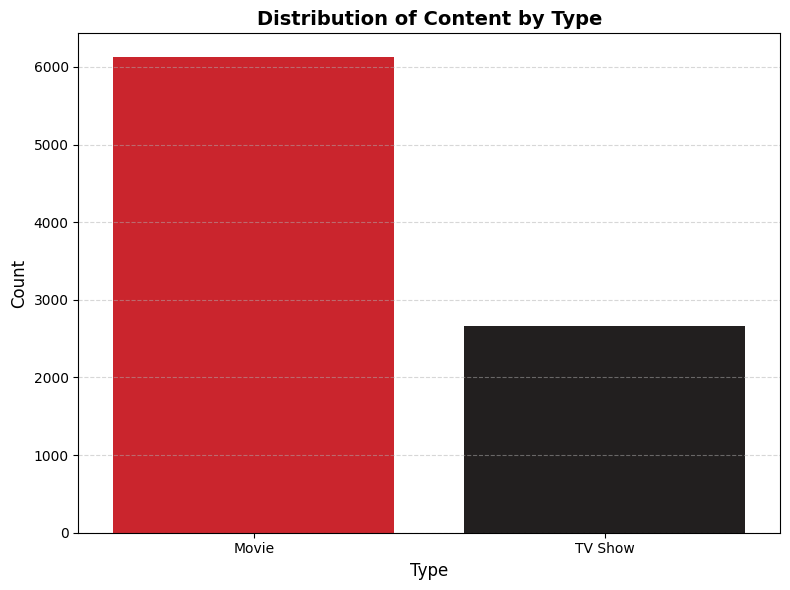

In [ ]:
# Step 4: Data Analysis and Visualization
# Content Type Distribution
import matplotlib.pyplot as plt
import seaborn as sns

custom_colors = ['#E50914', '#221f1f', '#B81D24', '#f5f5f1']  # red, black, crimson, off-white

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data, palette=custom_colors)
plt.title('Distribution of Content by Type', fontsize=14, fontweight='bold')
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-8-f0f38357fd98>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


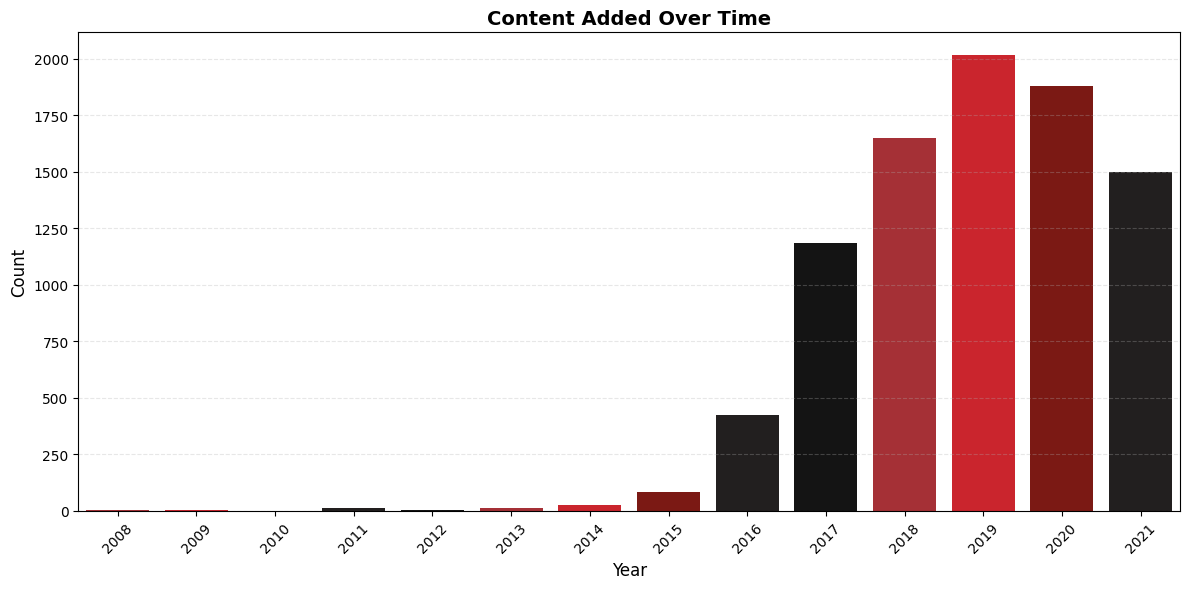

In [ ]:
# Content Added Over Time

# Sort years properly
data['year_added'] = data['date_added'].dt.year
year_order = sorted(data['year_added'].dropna().unique())

# Netflix-themed gradient (red shades to black)
colour_gradient = ['#B81D24', '#E50914', '#8C0A03', '#221f1f', '#141414']

plt.figure(figsize=(12, 6))
sns.countplot(
    x='year_added',
    data=data,
    palette=sns.color_palette(colour_gradient, n_colors=len(year_order)),
    order=year_order
)
plt.title('Content Added Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-9-8e37beaf3d15>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings.index, y=ratings.values, palette=sns.color_palette(col_palette, n_colors=len(ratings)))


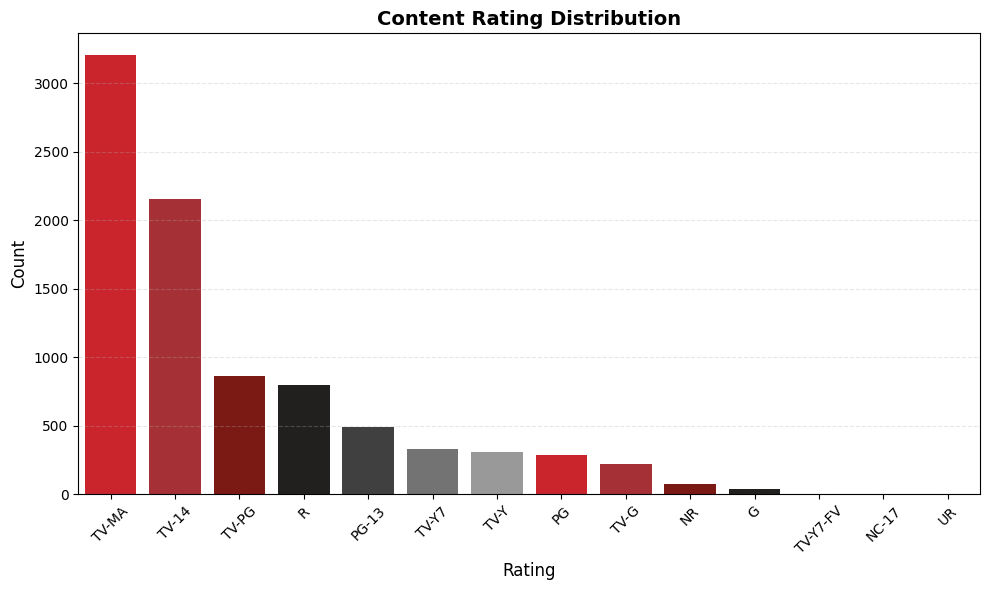

In [ ]:
# Rating Distribution

ratings = data['rating'].value_counts()

col_palette = ['#E50914', '#B81D24', '#8C0A03', '#221f1f', '#404040', '#737373', '#999999']

plt.figure(figsize=(10, 6))
sns.barplot(x=ratings.index, y=ratings.values, palette=sns.color_palette(col_palette, n_colors=len(ratings)))
plt.title('Content Rating Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-10-9d8f90ccbc74>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values,


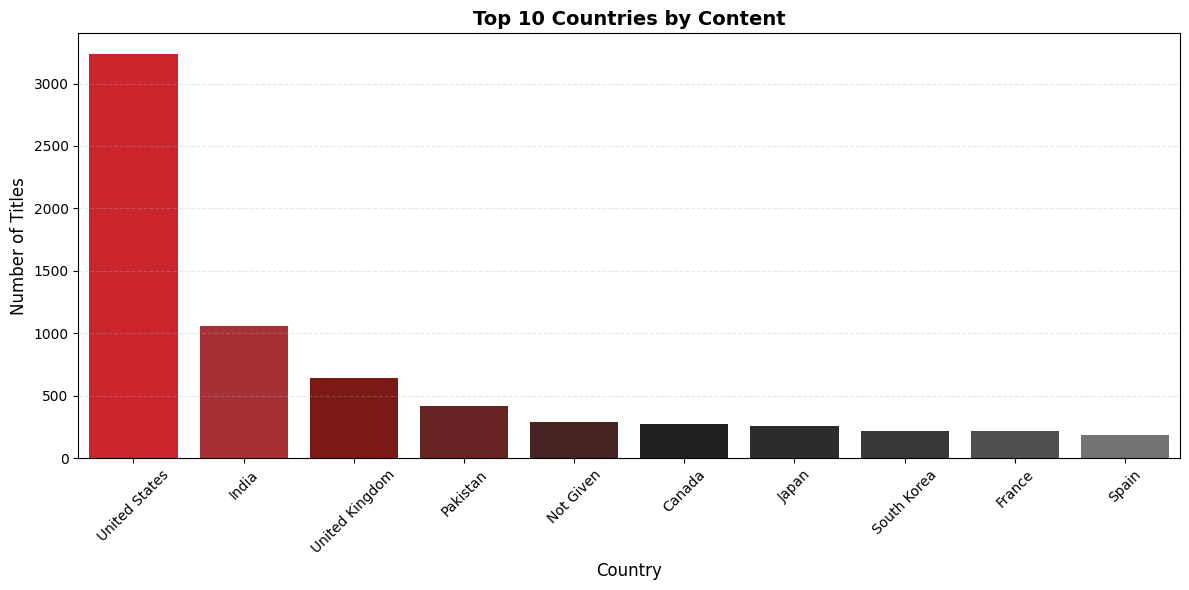

In [ ]:
# Top 10 Countries by Content

top_countries = data['country'].value_counts().head(10)
palette_colors = ['#E50914', '#B81D24', '#8C0A03', '#721817', '#4B1D1D',
                  '#221f1f', '#2C2C2C', '#383838', '#505050', '#737373']

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values,
            palette=sns.color_palette(palette_colors, n_colors=10))
plt.title('Top 10 Countries by Content', fontsize=14, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


<ipython-input-11-56575dc06ab8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set1')


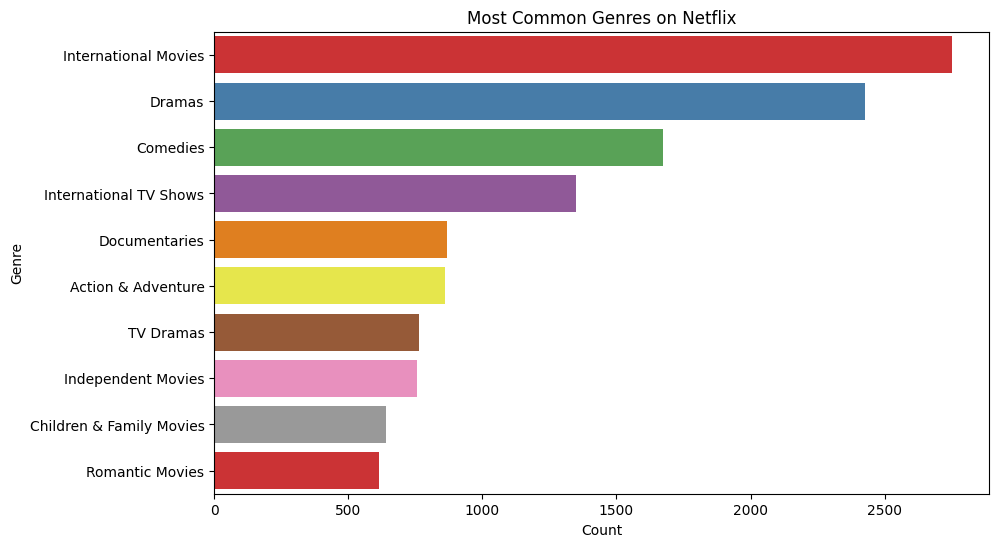

In [ ]:
# Most Common Genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set1')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

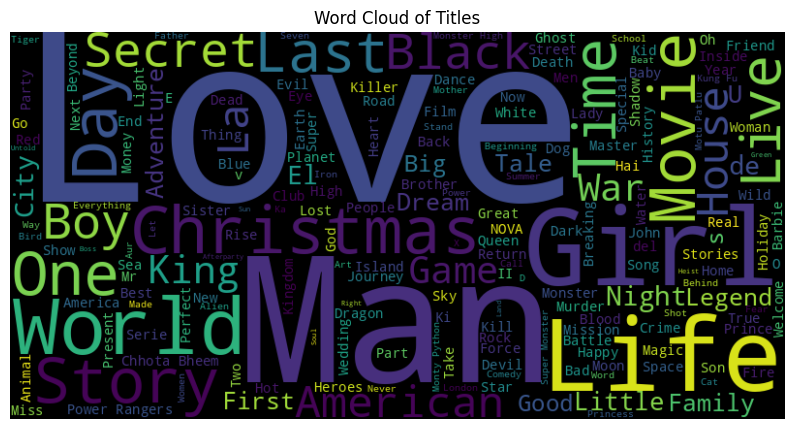

In [ ]:
# Word Cloud for Titles
titles = ' '.join(data['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles')
plt.show()

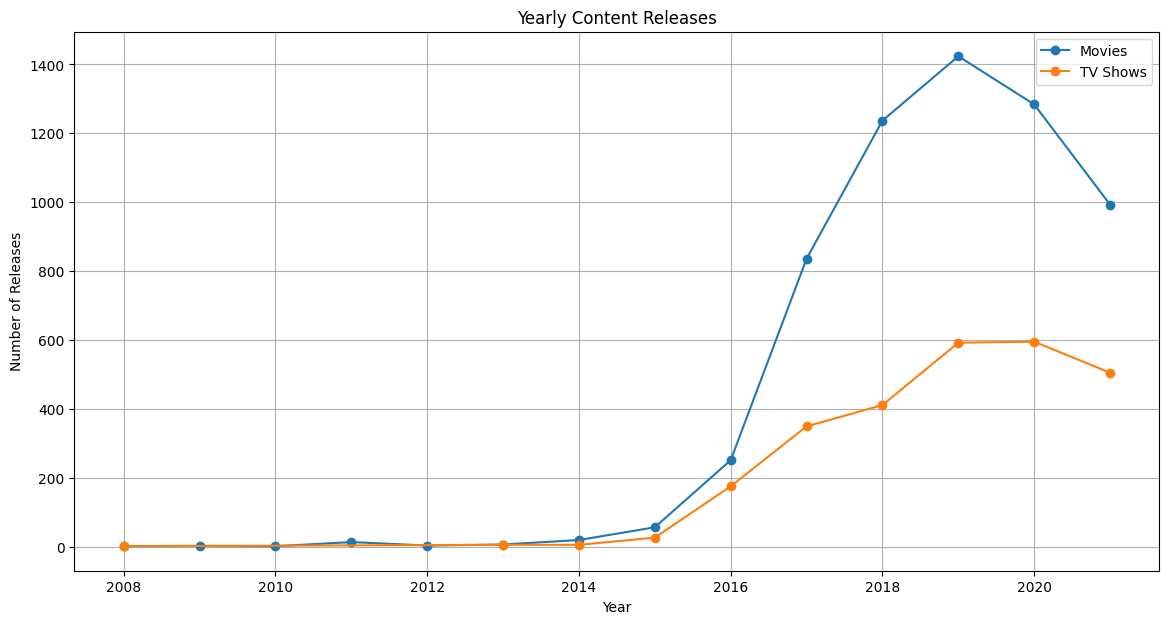

In [ ]:
# Yearly Content Releases
yearly_movies = data[data['type'] == 'Movie']['year_added'].value_counts().sort_index()
yearly_shows = data[data['type'] == 'TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.plot(yearly_movies.index, yearly_movies.values, label='Movies', marker='o')
plt.plot(yearly_shows.index, yearly_shows.values, label='TV Shows', marker='o')
plt.title('Yearly Content Releases')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-14-0122523417b6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')


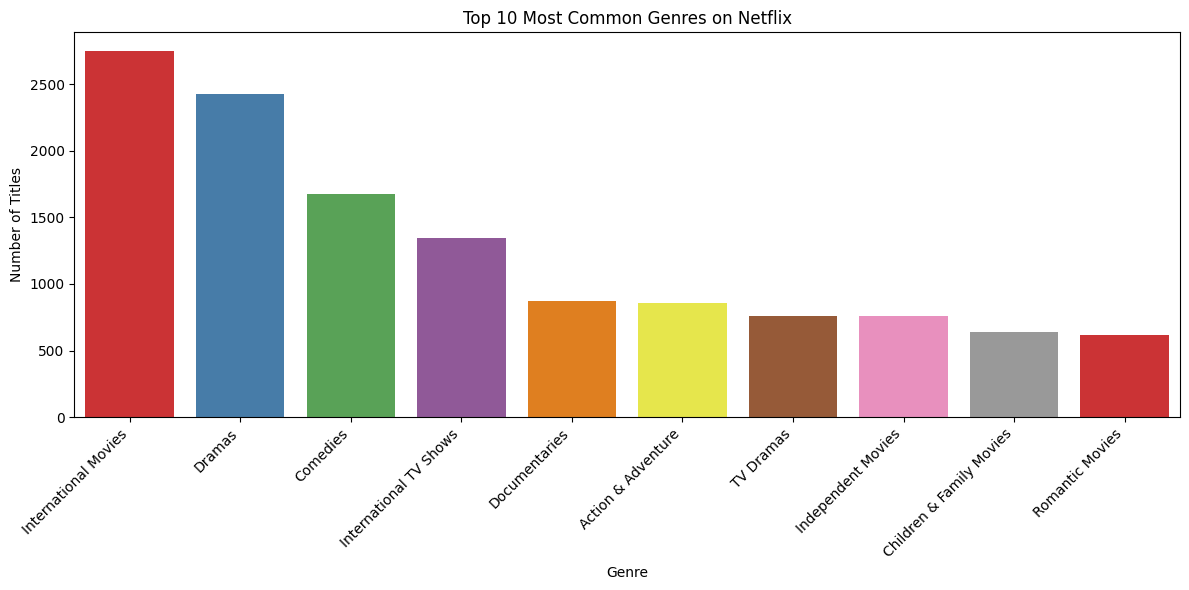

In [ ]:

# Explode the 'listed_in' column to get individual genres
data['genres'] = data['listed_in'].str.split(', ')
genre_list = [genre for sublist in data['genres'] for genre in sublist]
genre_counts = pd.Series(genre_list).value_counts().nlargest(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set1')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
import os

# Step 5: Save Cleaned Data
output_path='/mnt/data/netflix_cleaned.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_path),exist_ok=True)

data.to_csv(output_path,index=False)
print(f"Cleaned dataset saved to{output_path}")

print("\nAnalysis and Visualization Completed.")

Cleaned dataset saved to/mnt/data/netflix_cleaned.csv

Analysis and Visualization Completed.


In [ ]:
#  Test Cases for Netflix EDA ---
assert data['type'].notnull().all(), "Missing values in 'type'"
assert data['show_id'].is_unique, "Duplicate show_id found"
assert data['year_added'].between(1900, 2025).all(), "Invalid year in year_added"
assert data['genres'].apply(lambda x: isinstance(x, list)).all(), "Genres not split properly"
assert pd.api.types.is_datetime64_any_dtype(data['date_added']), "'date_added' is not datetime"
print("All tests passed!")

All tests passed!
